In [8]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.10 


In [1]:
import numpy as np
import cv2

In [10]:
img = cv2.imread('../img/')
# cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

error: -------src-dir-------/opencv-2.4.10/modules/highgui/src/window.cpp:501: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvShowImage


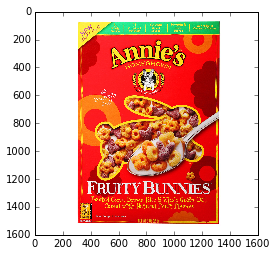

In [19]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [24]:
cv2.findContours(img,mode=cv2.CV_CHAIN_APPROX_NONE)

AttributeError: 'module' object has no attribute 'CV_CHAIN_APPROX_NONE'

In [25]:
import cv

In [29]:
from cv import Threshold

In [32]:
def detect_outline(image, threshold=Threshold):
        img_size = cv.GetSize(image)
        grayscale = cv.CreateImage(img_size, 8, 1)
        cv.CvtColor(image, grayscale, cv.CV_BGR2GRAY)
        cv.EqualizeHist(grayscale, grayscale)

        storage = cv.CreateMemStorage(0)
        cv.Threshold(grayscale, grayscale, threshold, 255, cv.CV_THRESH_BINARY)
        contours = cv.FindContours(grayscale, cv.CreateMemStorage(), cv.CV_RETR_TREE, cv.CV_CHAIN_APPROX_SIMPLE)

        if len(contours) > 0:
            return cv.ApproxPoly(contours, storage, cv.CV_POLY_APPROX_DP, 1.5, 1)
        return contours

In [35]:
detect_outline(cv.fromarray(img))

TypeError: a float is required

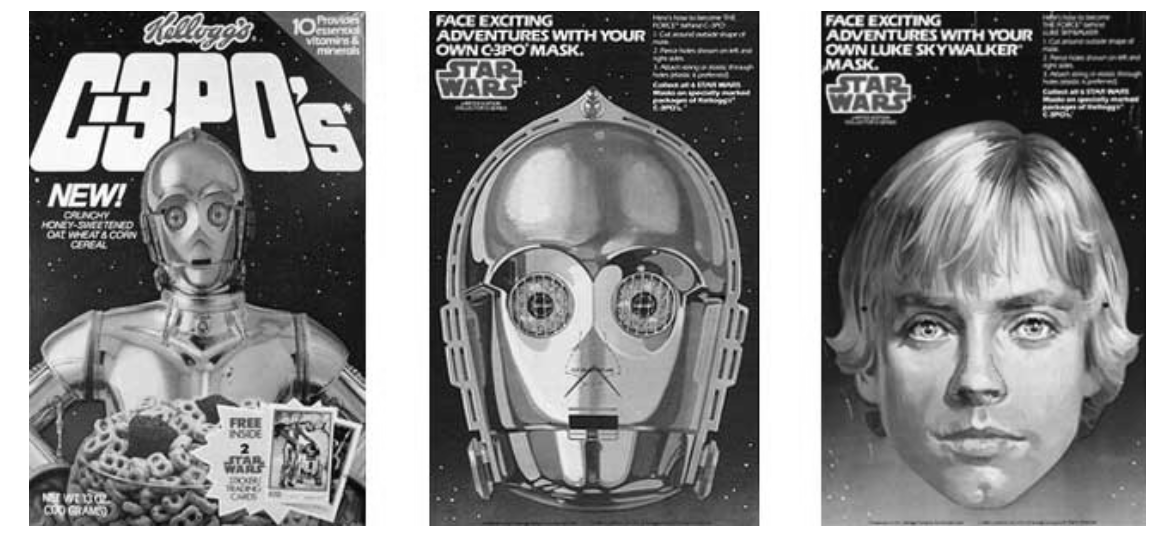

In [147]:
# Read the image
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# img = cv2.imread('../img/img_183_newmansownvanillaalmond.jpg')
# img = cv2.imread('../img/faces/mrt-large.jpg')
# img = cv2.imread('../img/faces/quaker.jpg')
img = cv2.imread('../img/faces/c3p0s_cereal_650x300_a01_11.jpg')
# img = cv2.imread('../img/faces/Quaker_logo.png')


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# from matplotlib import figure
# fig, ax = subplots(figsize=(18, 2))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(gray, cmap='gray',);

In [148]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print "Found {0} faces!".format(len(faces))
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

Found 1 faces!


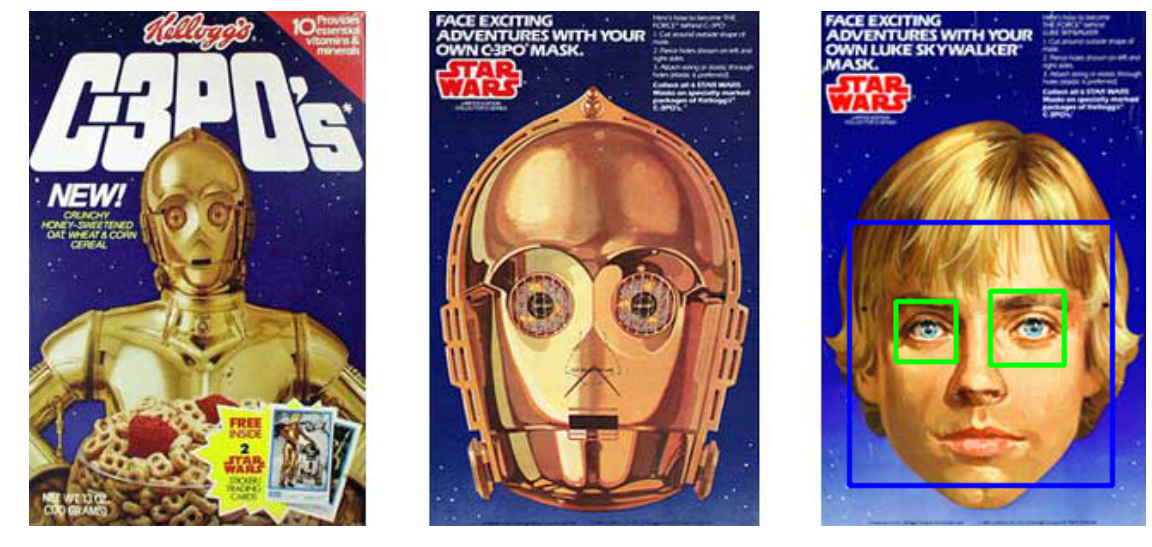

In [149]:
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [134]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [70]:
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.cv.CV_HAAR_SCALE_IMAGE
)

In [71]:


# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)


Found 1 faces!


In [176]:
contours0, hierarchy = cv2.findContours( gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = [cv2.approxPolyDP(cnt, 3, True) for cnt in contours0]

In [181]:
def update(levels):
    vis = np.zeros((h, w, 3), np.uint8)
    levels = levels - 3
    cv2.drawContours(vis, contours, (-1, 3)[levels <= 0], (128,255,255), 3, cv2.CV_AA, hierarchy, abs(levels) )
    plt.imshow(vis)

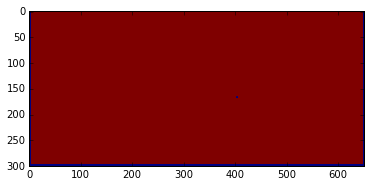

In [185]:
cv2.drawContours(gray, contours, -1, (0,255,0), 3)
plt.imshow(gray);

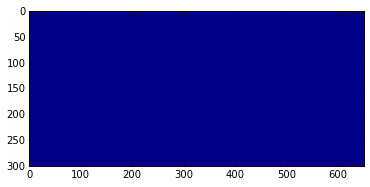

In [175]:
cv2.drawContours(gray, contours, -1, (128,255,255,))



In [171]:
contours = [cv2.approxPolyDP(cnt, 3, True) for cnt in contours0]

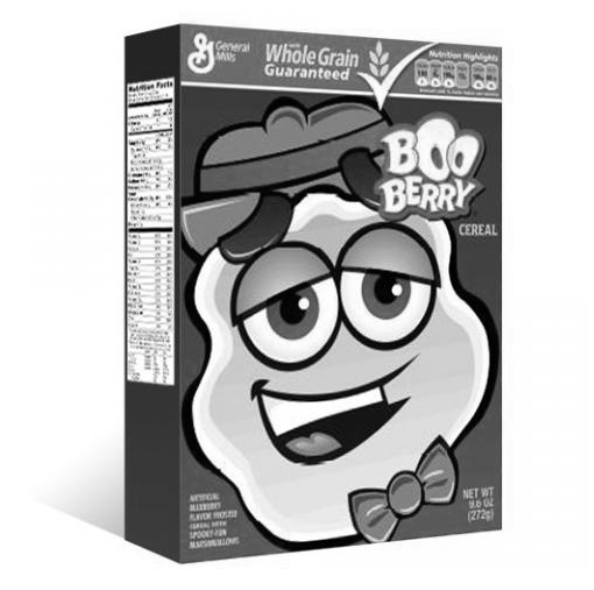

In [188]:
img = cv2.imread('../img/img_042_gmbooberry.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# from matplotlib import figure
# fig, ax = subplots(figsize=(18, 2))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(gray, cmap='gray',);

In [191]:
im = img
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

ValueError: need more than 2 values to unpack

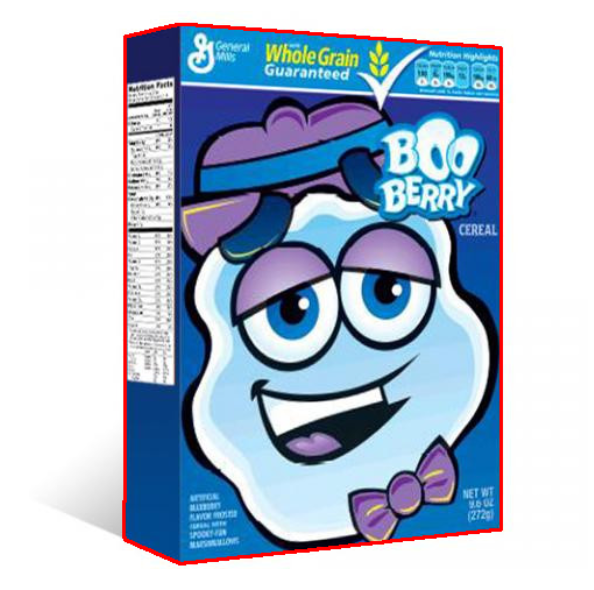

In [287]:
img = cv2.imread('../img/img_042_gmbooberry.jpg')

imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 180,255,cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, contours, -1, (0,0,255), 2)

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [279]:
area = cv2.contourArea(contours)

TypeError: contour is not a numpy array, neither a scalar

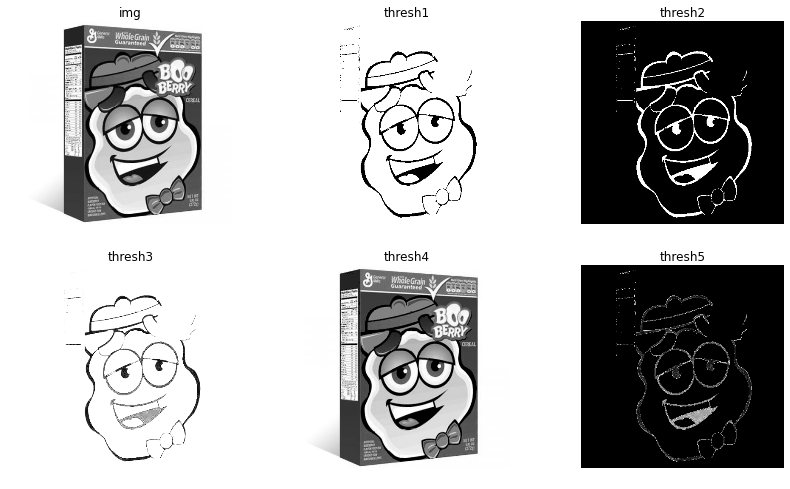

In [288]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
# img = cv2.imread('messi2.jpg',0)
img = cv2.imread('../img/img_042_gmbooberry.jpg', 0)

ret,thresh1 = cv2.threshold(img,33,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,33,255,cv2.THRESH_BINARY_INV)
    ret,thresh3 = cv2.threshold(img,33,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,33,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,33,255,cv2.THRESH_TOZERO_INV)
 
thresh = ['img','thresh1','thresh2','thresh3','thresh4','thresh5']
 

for i in xrange(6):
    
    plt.subplot(2,3,i+1),plt.imshow(eval(thresh[i]),'gray')
    
    plt.title(thresh[i])
 
plt.show()

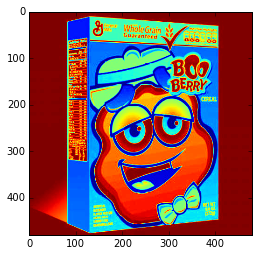

In [292]:
plt.imshow(img)

In [294]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254]], dtype=uint8)

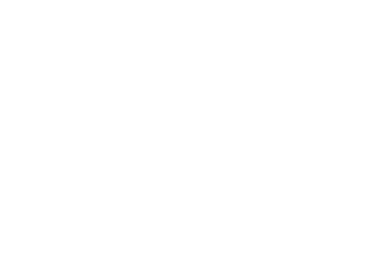

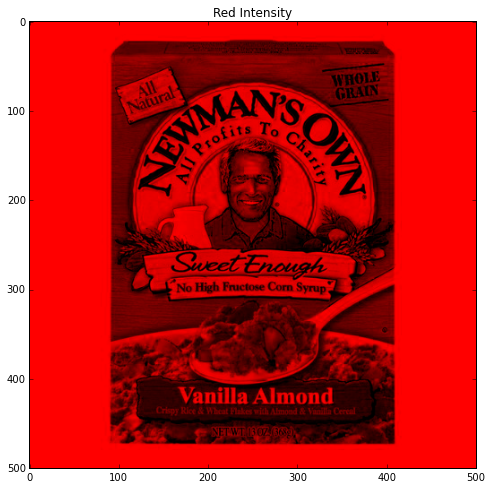

In [308]:
img = cv2.imread('../img/img_183_newmansownvanillaalmond.jpg')
red, yellow = img.copy(), img.copy()
red[:,:,1:3] = 0
yellow[:,:,2]=0
# plt.imshow(images=[red,yellow], titles=['Red Intensity','Yellow Intensity'])

plt.axis("off")
plt.figure(figsize=(14,8))
plt.title('Red Intensity')
plt.imshow(red, );

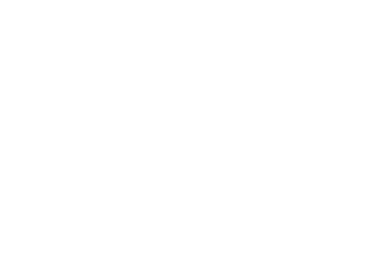

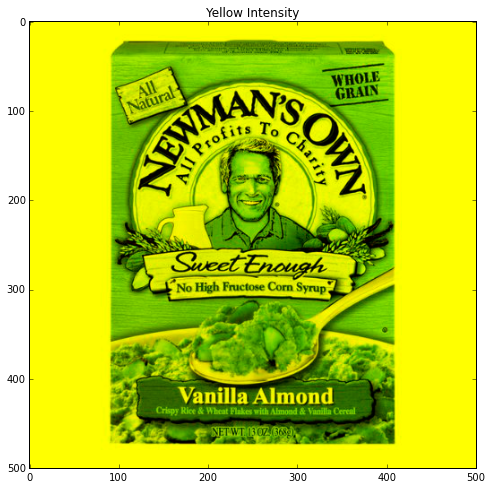

In [303]:
plt.axis("off")
plt.figure(figsize=(14,8))
plt.title('Yellow Intensity')
plt.imshow(yellow);

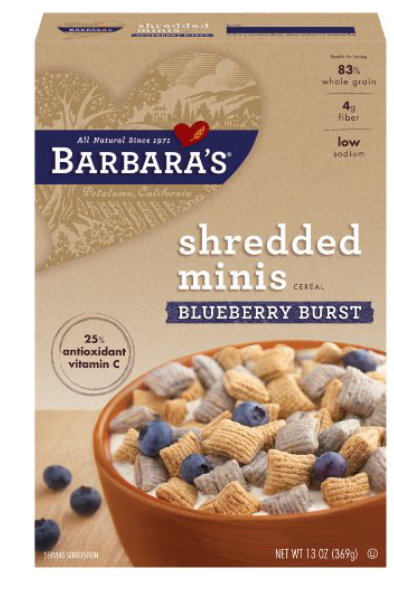

In [340]:
img = cv2.imread('../img/img_018_barbarasbakeryshreddedminisblueberryburst.jpg')


plt.figure(figsize=(20,10))

# f, (ax1, ax2) = plt.subplots(1, 2)

# ax1.axis("off")

plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

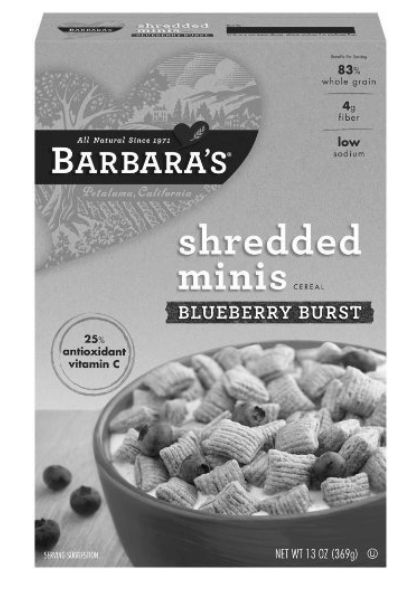

(0, 256)

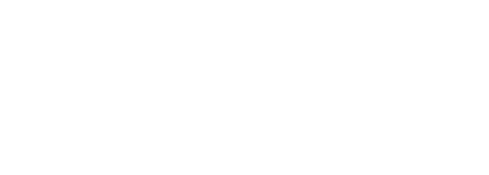

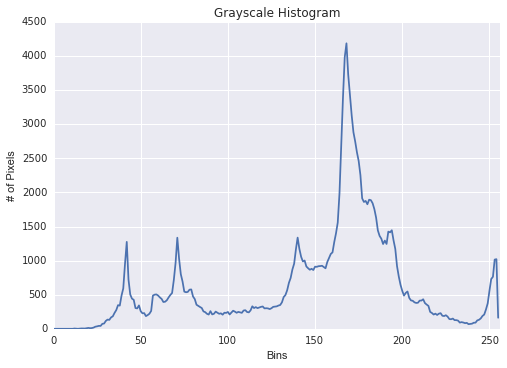

In [336]:
# plt.subplot(211)
# plt.axis("off")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()
plt.subplot(212)
plt.axis("off")
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

flattened feature vector size: 768


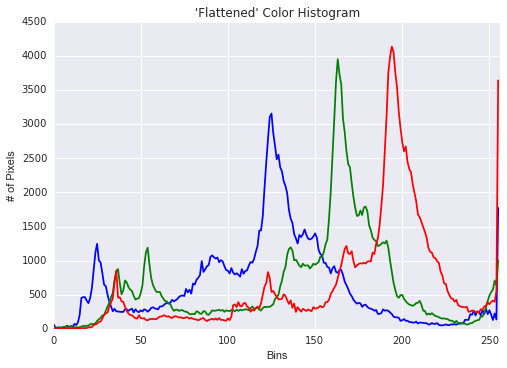

In [333]:
import seaborn as sns

chans = cv2.split(img)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and
	# concatenate the resulting histograms for each
	# channel
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	features.extend(hist)
 
	# plot the histogram
	plt.plot(hist, color = color)
	plt.xlim([0, 256])
 
# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent
print "flattened feature vector size: %d" % (np.array(features).flatten().shape)

<matplotlib.colorbar.Colorbar instance at 0x7f8f1ac92170>

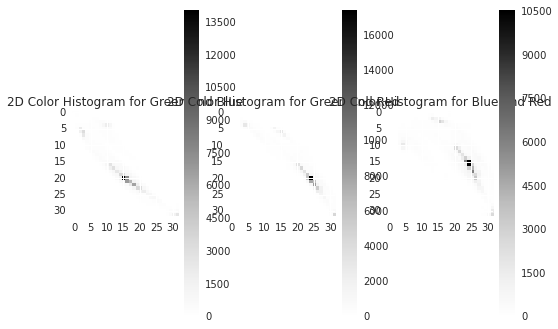

In [334]:
fig = plt.figure()
 
# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Blue")
plt.colorbar(p)
 
# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Red")
plt.colorbar(p)
 
# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Blue and Red")
plt.colorbar(p)

In [344]:
resized_image = cv2.resize(img, (10, 10), interpolation= cv2.INTER_NEAREST) 

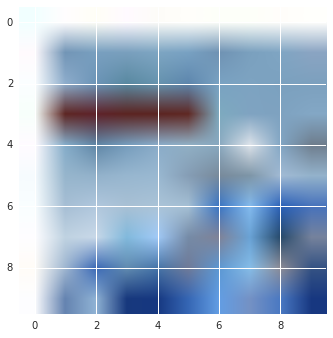

In [345]:
plt.imshow(resized_image)

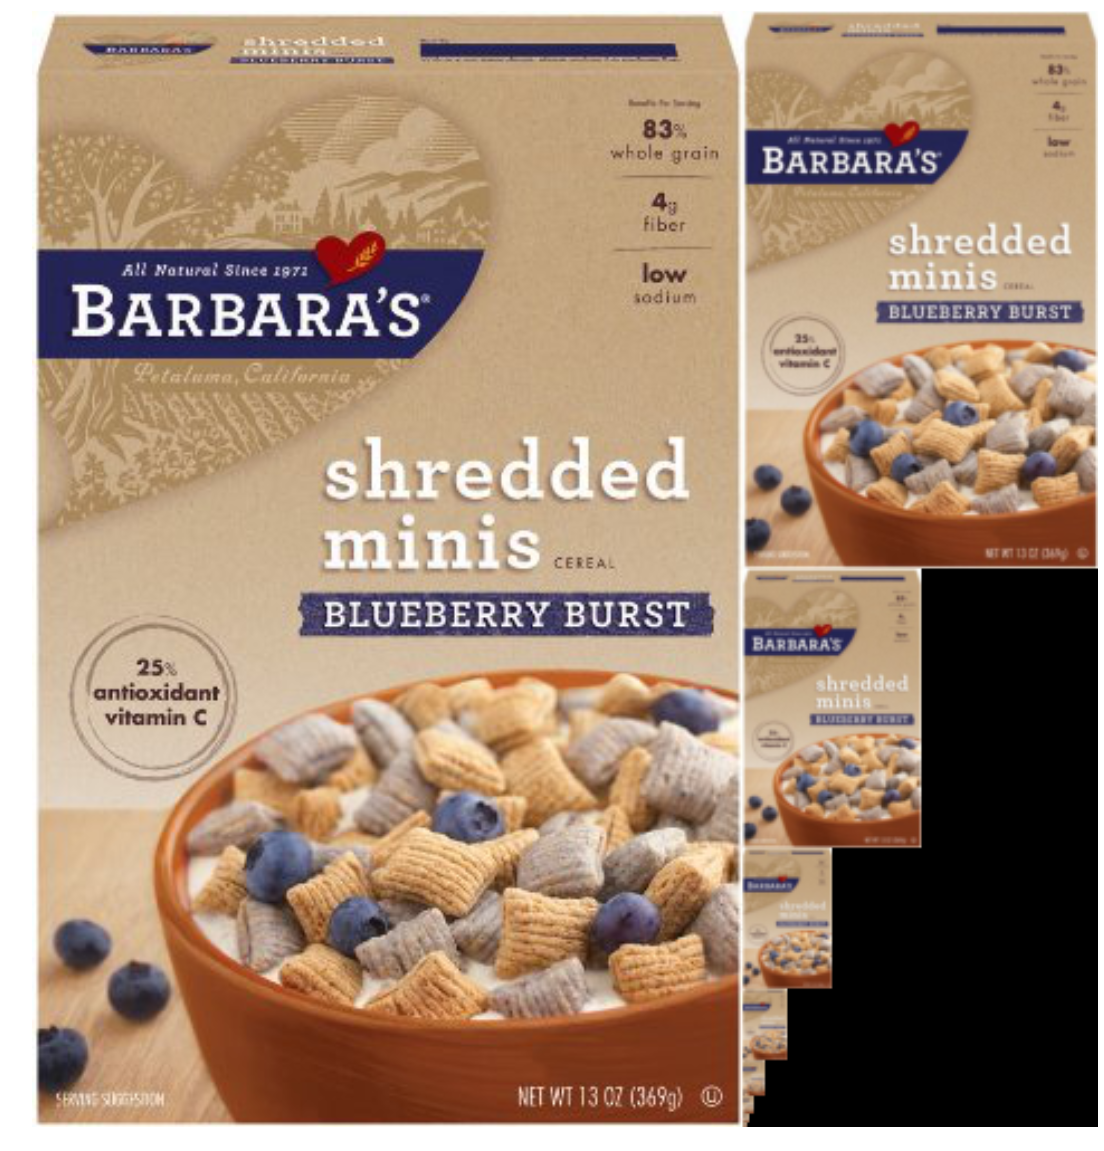

In [353]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import pyramid_gaussian


image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, dim = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2))

composite_image = np.zeros((rows, cols + cols / 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots(figsize=(20,20))
plt.axis("off")
ax.imshow(composite_image);
